In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images, test_images = train_images / 255.0, test_images / 255.0

# Create a CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1478/1875 [======================>.......] - ETA: 13s - loss: 0.1669 - accuracy: 0.9493

In [ ]:

predicted_classes = np.argmax(predictions, axis=1)

# Compare the predicted classes to the true labels
correct_predictions = np.sum(predicted_classes == test_labels)
accuracy = correct_predictions / len(test_labels)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")


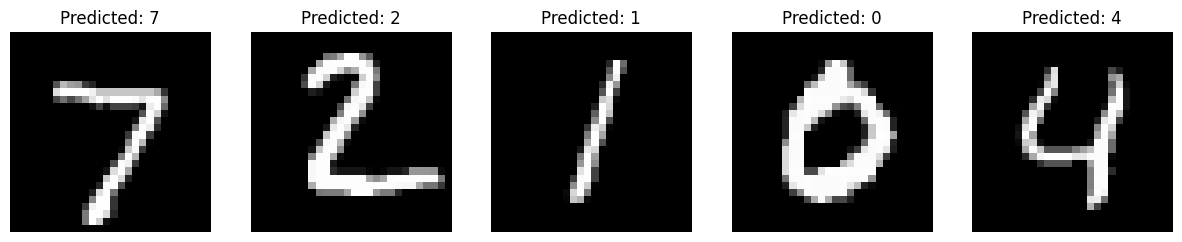

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

num_images_to_display = 5  # Choose the number of images to display

# Create a single figure for all images
plt.figure(figsize=(15, 3))  # Adjust the figure size as needed

for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(np.squeeze(test_images[i]), cmap='gray')  # Display the test image
    plt.title(f"Predicted: {predicted_classes[i]}")  # Display the predicted label
    plt.axis('off')  # Turn off the axis

plt.show()
